In [131]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

%matplotlib inline

In [132]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

print(*train.shape)
print(*test.shape)

891 12
418 11


In [133]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### We have 11 feature columns and target variable SURVIVED which is binary
### Pclass, Sex and Embarked are CATEGORICAL features Age, SibSp, Parch and fare are continous variables
### We will use Name, Ticket and Cabin variable in Feature Engineering

# EDA

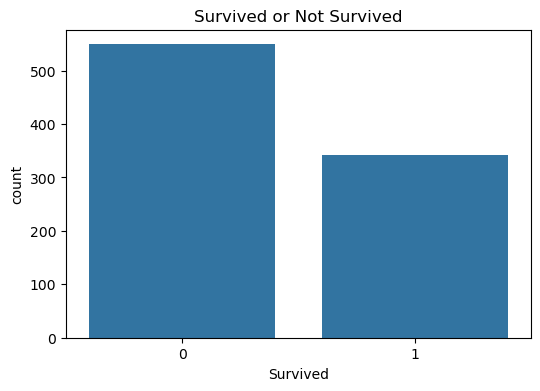

In [135]:
fig , ax =plt.subplots(figsize=(6,4))
sns.countplot(x='Survived',data=train)
plt.title("Survived or Not Survived")
plt.show()

In [136]:
n=len(train)
surv_0=len(train[train['Survived']==0])
surv_1=len(train[train['Survived']==1])
print(surv_0)
print(surv_1)
print(f"% of passanger not survived in train dataset :{surv_0*100/n}")
print(f"% of passanger survived in train dataset :{surv_1*100/n}")

549
342
% of passanger not survived in train dataset :61.61616161616162
% of passanger survived in train dataset :38.38383838383838


## Find correlation between Numerical Value

In [137]:
cat=['Pclass','Sex','Embarked']
num = ['Age','SibSp', 'Parch','Fare']

<Axes: >

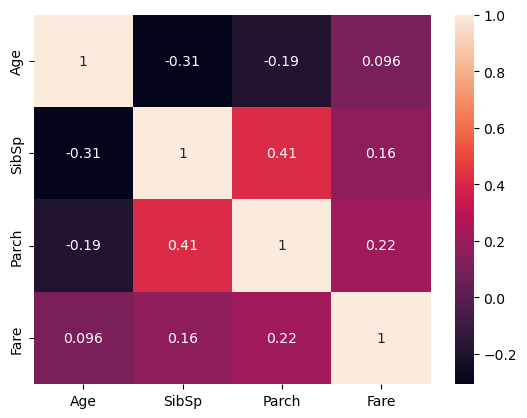

In [138]:
corr_df = train[num]
sns.heatmap(corr_df.corr(method='pearson'),annot=True)

In [139]:
csq = chi2_contingency(pd.crosstab(train['Survived'],train['Sex']))
print(csq[1])

1.1973570627755645e-58


In [140]:
csq2 = chi2_contingency(pd.crosstab(train['Survived'],train['Embarked']))
csq2[1]

1.769922284120912e-06

In [141]:
csq3 = chi2_contingency(pd.crosstab(train['Survived'],train['Pclass']))
csq3[1]

4.549251711298793e-23

# Visualization

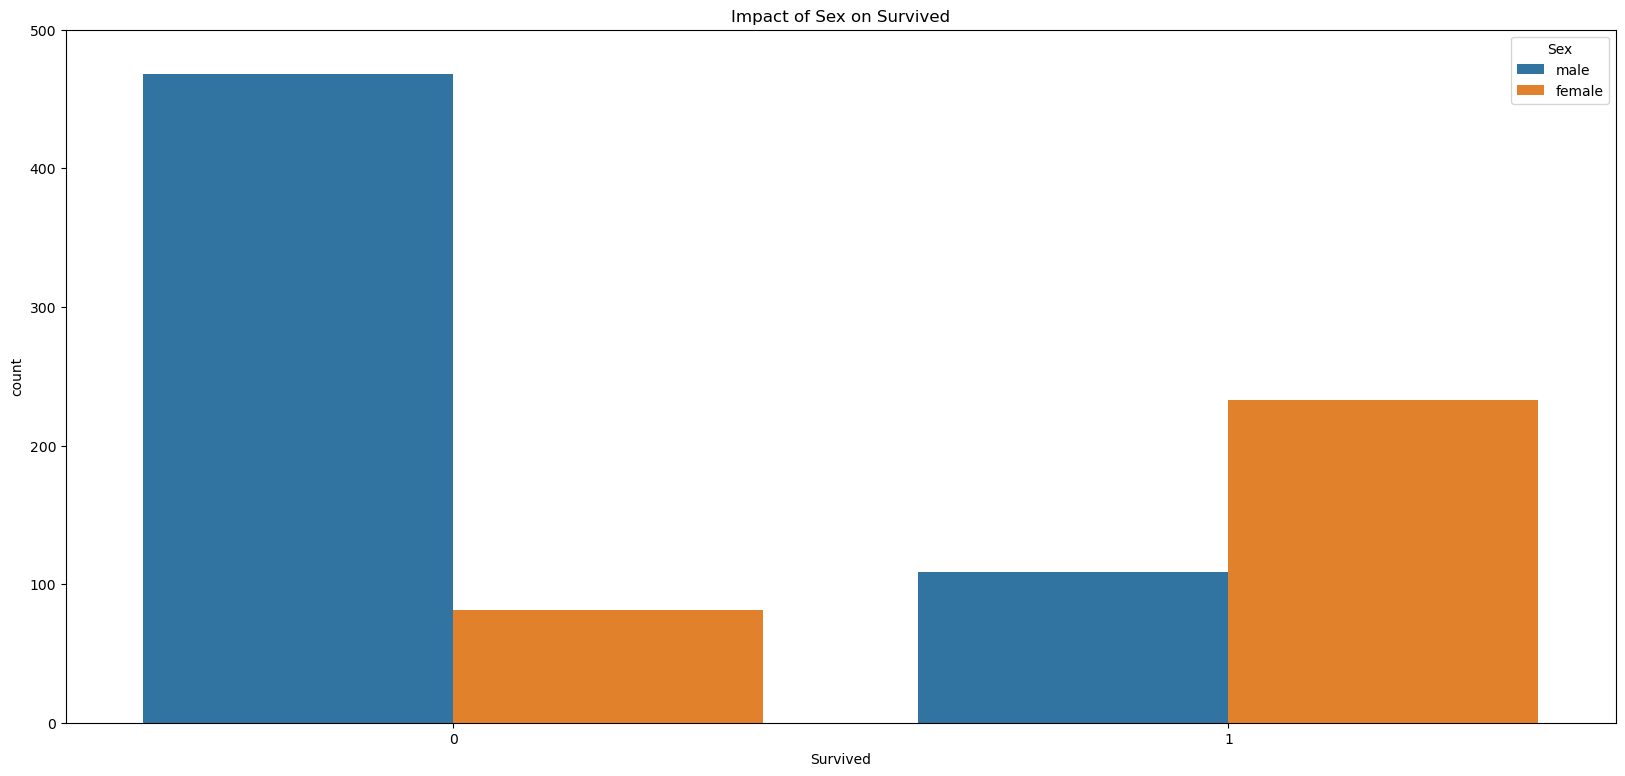

In [142]:
fig,ax = plt.subplots(figsize=(20,9))
sns.countplot(x='Survived',data=train,hue='Sex')
ax.set_ylim(0,500)
plt.title("Impact of Sex on Survived")
plt.show()


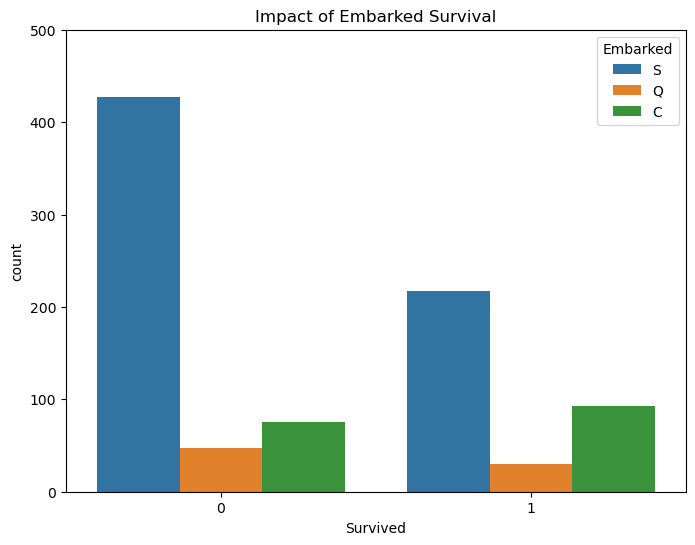

In [143]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Survived',data=train,hue='Embarked')
ax.set_ylim(0,500)
plt.title("Impact of Embarked Survival")
plt.show()              

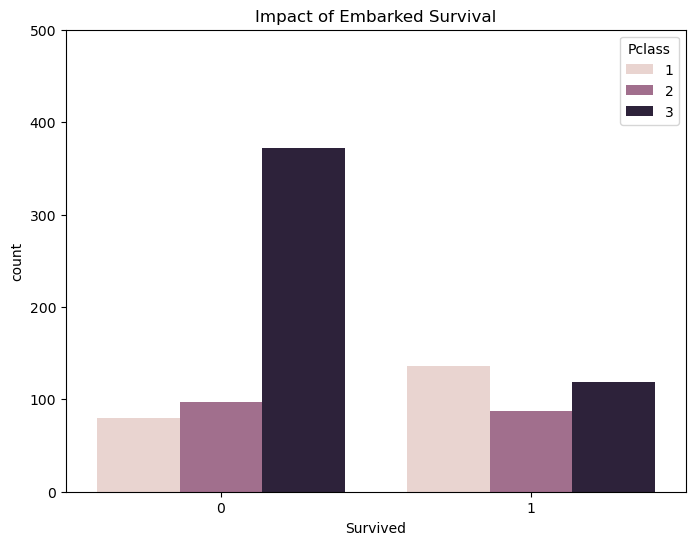

In [144]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Survived',data=train,hue='Pclass')
ax.set_ylim(0,500)
plt.title("Impact of Embarked Survival")
plt.show()              

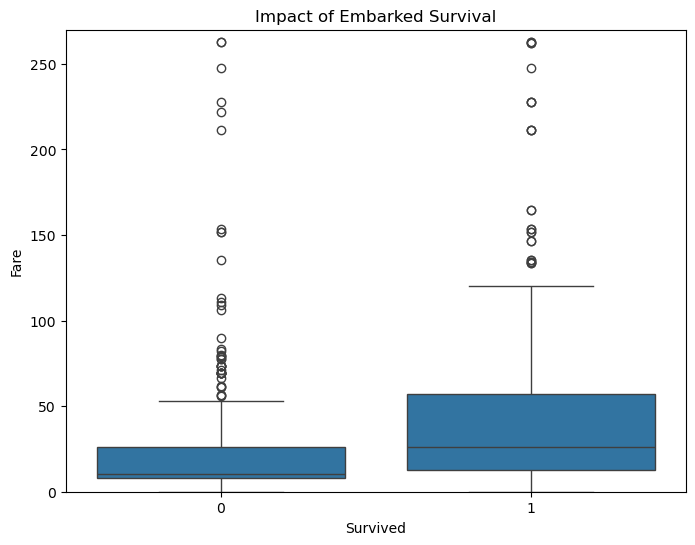

In [145]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Survived',y='Fare',data=train)
ax.set_ylim(0,270)
plt.title("Impact of Embarked Survival")
plt.show()              

## Handle Missing Values

In [146]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [147]:
print(train.isnull().sum()*100/n)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [148]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [149]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [150]:
medage = np.nanmedian(train['Age'])
train['Age']=train['Age'].fillna(medage)
test['Age']=test['Age'].fillna(medage)

In [151]:
train.drop(columns='Cabin',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [152]:
test.drop(columns='Cabin',axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


## Embarked

In [153]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [154]:
train.Embarked = train.Embarked.fillna('S')

## Fare

In [155]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [156]:
medfare = np.nanmedian(train.Fare)
train.Fare = train.Fare.fillna(medfare)
test.Fare = test.Fare.fillna(medfare)

## Feature Engineering

In [157]:
train['Family_Mem'] = train.apply(lambda x: x['SibSp']+x['Parch'],axis=1)
test['Family_Mem'] = test.apply(lambda x:  x['SibSp']+x['Parch'],axis=1)

In [158]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Mem
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [159]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return  "" 

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\haris\AppData\Local\Temp\ipykernel_19444\1802528476.py:2: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search('([A-Za-z]+)\.',name)


In [160]:
train["title"]=train.Name.apply(get_title)
test["title"]=test.Name.apply(get_title)

In [161]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Mem,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr


In [162]:
title_lev1= list(train.title.value_counts().reset_index())
title_lev2= list(test.title.value_counts().reset_index())


In [163]:
title_lev = list(set().union(title_lev1,title_lev2))

train['title']=pd.Categorical(train['title'],categories=title_lev)
test['title']=pd.Categorical(test['title'],categories=title_lev)

In [178]:
cols=['Pclass','Sex','title','Embarked']
feacols = ['Pclass','Sex','Age','Family_Mem','title','Fare','Embarked']

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
 12  Family_Mem   891 non-null    int64   
 13  title        0 non-null      category
dtypes: category(4), float64(2), int64(5), object(3)
memory usage: 73.7+ KB


In [180]:
for c in cols:
    train[c] = train[c].astype('category')
    test[c] = test[c].astype('category')

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
 12  Family_Mem   891 non-null    int64   
 13  title        0 non-null      category
dtypes: category(4), float64(2), int64(5), object(3)
memory usage: 73.7+ KB


In [182]:
train_df = train[feacols]
test_df = test[feacols]

In [183]:
train_df=pd.get_dummies(train_df,columns=cols,drop_first=True)
test_df=pd.get_dummies(test_df,columns=cols,drop_first=True)

In [184]:
y = train['Survived']
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [185]:
train_df

,Age,Family_Mem,Fare,Pclass_2,Pclass_3,Sex_male,title_count,Embarked_Q,Embarked_S
0,22.0,1,7.2500,False,True,True,False,False,True
1,38.0,1,71.2833,False,False,False,False,False,False
2,26.0,0,7.9250,False,True,False,False,False,True
3,35.0,1,53.1000,False,False,False,False,False,True
4,35.0,0,8.0500,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,True,False,True,False,False,True
887,19.0,0,30.0000,False,False,False,False,False,True
888,28.0,3,23.4500,False,True,False,False,False,True
889,26.0,0,30.0000,False,False,True,False,False,False


## Train test Split

In [186]:
x_train,x_test,y_train,y_test = train_test_split(train_df, y, test_size=.3)1

## Random Forest

In [190]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [192]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
rfc_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

[[148  18]
 [ 32  70]]
0.8134328358208955


In [194]:
rfc.feature_importances_

array([0.25627844, 0.07611486, 0.26312752, 0.01845475, 0.07014545,
       0.27599728, 0.        , 0.0114581 , 0.0284236 ])

In [197]:
feature_importance = pd.DataFrame(rfc.feature_importances_,index=x_train.columns,columns=['important']).sort_values('important',ascending=False)
feature_importance

,important
Sex_male,0.275997
Fare,0.263128
Age,0.256278
Family_Mem,0.076115
Pclass_3,0.070145
Embarked_S,0.028424
Pclass_2,0.018455
Embarked_Q,0.011458
title_count,0.000000


## RF with Grid Search

In [198]:
grid = {
    'n_estimators':[50,100,200,500,1000],
    'max_depth':[2,4,5,6,7,8,9],
    'criterion':['gini','entropy']
}

In [200]:
cv_rfc=GridSearchCV(rfc,param_grid=grid,cv = 10)
cv_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 100, 200, 500, 1000]})

In [201]:
cv_rfc.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [203]:
cv_rfc.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 1000}

In [206]:
cv_rfc.best_index_

14

In [207]:
cv_rfc.best_score_

0.8428059395801331

In [208]:
y_pred = cv_rfc.predict(x_test)

In [212]:
xm=confusion_matrix(y_test,y_pred)
xm

array([[158,   8],
       [ 46,  56]], dtype=int64)